In [1]:
%%capture
import os
import tensorflow as tf
from tensorflow import keras
import pathlib
import zipfile
import math as m
import tarfile
!pip install Pillow
import pandas as pd
from sklearn.utils import shuffle
from PIL import Image
import random
from numpy import array
import numpy as np
import zipfile
from tqdm import tqdm_notebook
import csv
!pip install h5py
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
tf.enable_eager_execution()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import IPython.display as display

In [2]:
train_path = "/home/pk2573/GTSRB_Final_Training_Images.zip"
test_path = "/home/pk2573/GTSRB_Final_Test_Images.zip"

In [3]:
def un_zip(file_path):
    path, fname = os.path.split(file_path)
    
    if (fname.endswith("tgz")):
        tar = tarfile.open(fname, "r:gz")
        tar.extractall(path)
        tar.close()
    elif (fname.endswith("tar")):
        tar = tarfile.open(fname, "r:")
        tar.extractall(path)
        tar.close()
    elif (fname.endswith("zip")):
        zip_ref = zipfile.ZipFile(fname, 'r')
        zip_ref.extractall(path)
        zip_ref.close()
    
    if fname.split("_")[2] == "Training":
        new_path = path + "/" + fname.split("_")[0] + "/Final_Training/Images"
    elif fname.split("_")[2] == "Test":
        new_path = path + "/" + fname.split("_")[0] + "/Final_Test"
    
    return new_path

In [4]:
os.chdir(str(Path.home()))

In [5]:
train_path = un_zip(train_path)
train_p = pathlib.Path(train_path)

In [6]:
os.chdir(str(Path.home()))

In [7]:
test_path = un_zip(test_path)
test_p = pathlib.Path(test_path)

In [8]:
os.chdir(str(Path.home()))
print("All training folders found:")
for item in train_p.iterdir():
    print(item)
all_train_image_paths = list(train_p.glob('*/*'))
all_train_image_paths = [str(path) for path in all_train_image_paths]
random.shuffle(all_train_image_paths)
print("\nWe have " + str(len(all_train_image_paths)) + " training images")

All training folders found:
/home/pk2573/GTSRB/Final_Training/Images/00001
/home/pk2573/GTSRB/Final_Training/Images/00015
/home/pk2573/GTSRB/Final_Training/Images/00031
/home/pk2573/GTSRB/Final_Training/Images/00016
/home/pk2573/GTSRB/Final_Training/Images/00022
/home/pk2573/GTSRB/Final_Training/Images/00038
/home/pk2573/GTSRB/Final_Training/Images/00026
/home/pk2573/GTSRB/Final_Training/Images/00037
/home/pk2573/GTSRB/Final_Training/Images/00006
/home/pk2573/GTSRB/Final_Training/Images/00013
/home/pk2573/GTSRB/Final_Training/Images/00030
/home/pk2573/GTSRB/Final_Training/Images/00036
/home/pk2573/GTSRB/Final_Training/Images/00008
/home/pk2573/GTSRB/Final_Training/Images/00035
/home/pk2573/GTSRB/Final_Training/Images/00023
/home/pk2573/GTSRB/Final_Training/Images/00029
/home/pk2573/GTSRB/Final_Training/Images/00042
/home/pk2573/GTSRB/Final_Training/Images/00004
/home/pk2573/GTSRB/Final_Training/Images/00019
/home/pk2573/GTSRB/Final_Training/Images/00040
/home/pk2573/GTSRB/Final_Trainin

In [9]:
os.chdir(str(Path.home()))
print("All test folders found:")
for item in test_p.iterdir():
    print(item)
all_test_image_paths = list(test_p.glob('*/*'))
all_test_image_paths = [str(path) for path in all_test_image_paths]
random.shuffle(all_test_image_paths)
print("\nWe have " + str(len(all_test_image_paths)) + " training images")

All test folders found:
/home/pk2573/GTSRB/Final_Test/Images

We have 12631 training images


### Read Train Images and Labels

In [10]:
def readTrafficSigns(rootpath, train):

    images = [] 
    labels = [] 
    size = 150,150
    
    if train:
        for c in tqdm_notebook(range(0,43)):
            prefix = rootpath + '/' + str(format(c, '05d')) + '/' 
            gtFile = open(prefix + 'GT-'+ str(format(c, '05d')) + '.csv') 
            gtReader = csv.reader(gtFile, delimiter = ';')
            next(gtReader, None)
            for row in gtReader:
                image = Image.open(prefix + row[0])
                image = image.resize(size, Image.ANTIALIAS)
                images.append(array(image))
                labels.append(row[7]) 
            gtFile.close()
            
    else:
        prefix = rootpath + '/Images/' 
        gtFile = open("/home/pk2573/GT-final_test.csv")
        gtReader = csv.reader(gtFile, delimiter = ';')
        next(gtReader, None) 
        for row in gtReader:
            image = Image.open(prefix + row[0])
            image = image.resize(size, Image.ANTIALIAS)
            images.append(array(image))
            labels.append(row[7]) 
        gtFile.close()
      
    return np.array(images, dtype = int), np.array(labels, dtype = int)

In [11]:
x_train, y_train = readTrafficSigns(train_path, True)

In [12]:
x_test, y_test = readTrafficSigns(test_path, False)

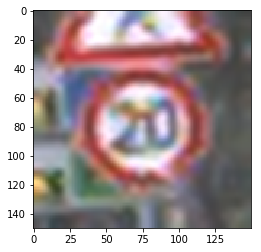

In [13]:
plt.imshow(x_train[0])

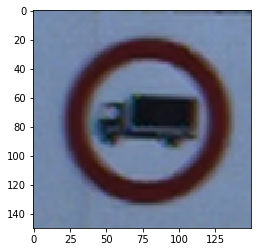

In [14]:
plt.imshow(x_test[0])

### Create Image Data Generators

In [15]:
"""
datagen_train = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 256
"""

"\ndatagen_train = ImageDataGenerator(\n      rescale = 1./255,\n      rotation_range = 40,\n      width_shift_range = 0.2,\n      height_shift_range = 0.2,\n      shear_range = 0.2,\n      zoom_range = 0.2,\n      horizontal_flip = True,\n      fill_mode = 'nearest')\n\ndatagen = ImageDataGenerator(rescale = 1./255)\nbatch_size = 256\n"

In [16]:
"""
def extract_features(directory, sample_count, check):
    features = np.zeros(shape = (sample_count, 200, 200, 3))
    labels = np.zeros(shape = (sample_count))
    if check:
        generator = datagen_train.flow_from_directory(
            directory,
            target_size = (200, 200),
            batch_size = batch_size,
            class_mode = 'binary')
    else:
        generator = datagen.flow_from_directory(
            directory,
            target_size = (200, 200),
            batch_size = batch_size,
            class_mode = 'binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = inputs_batch
        if (i + 1)*len(features_batch) <= sample_count:
            features[i * len(features_batch) : (i + 1) * len(features_batch)] = features_batch
            labels[i * len(features_batch) : (i + 1) * len(features_batch)] = labels_batch
        else:
            features[i * len(features_batch) : (i + 1) * len(features_batch)] = features_batch[:len(features[i * len(features_batch) : (i + 1) * len(features_batch)])]
            labels[i * len(features_batch) : (i + 1) * len(features_batch)] = labels_batch[:len(features[i * len(features_batch) : (i + 1) * len(features_batch)])]
        i += 1
        if i * batch_size >= sample_count:
            break

    return features, labels
"""

"\ndef extract_features(directory, sample_count, check):\n    features = np.zeros(shape = (sample_count, 200, 200, 3))\n    labels = np.zeros(shape = (sample_count))\n    if check:\n        generator = datagen_train.flow_from_directory(\n            directory,\n            target_size = (200, 200),\n            batch_size = batch_size,\n            class_mode = 'binary')\n    else:\n        generator = datagen.flow_from_directory(\n            directory,\n            target_size = (200, 200),\n            batch_size = batch_size,\n            class_mode = 'binary')\n\n    i = 0\n    for inputs_batch, labels_batch in generator:\n        features_batch = inputs_batch\n        if (i + 1)*len(features_batch) <= sample_count:\n            features[i * len(features_batch) : (i + 1) * len(features_batch)] = features_batch\n            labels[i * len(features_batch) : (i + 1) * len(features_batch)] = labels_batch\n        else:\n            features[i * len(features_batch) : (i + 1) * len(feat

In [17]:
"""
x_train, y_train = extract_features(train_path, int(0.8*len(all_train_image_paths)), True)
x_val, y_val = extract_features(train_path, int(0.2*len(all_train_image_paths)), False)
x_test, y_test = extract_features(test_path, int(len(all_test_image_paths)), False)
"""

'\nx_train, y_train = extract_features(train_path, int(0.8*len(all_train_image_paths)), True)\nx_val, y_val = extract_features(train_path, int(0.2*len(all_train_image_paths)), False)\nx_test, y_test = extract_features(test_path, int(len(all_test_image_paths)), False)\n'

### Create Model

In [18]:
class CNN(object):
    
    def __init__(self, activation, initializer, regularizer, x_train, y_train, epochs, batch_size, input_shape, filter_size, val_split):
        self.activation = activation
        self.initializer = initializer
        self.regularizer = regularizer
        self.x_train = x_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.input_shape = input_shape
        self.filter = filter_size
        self.val_split = val_split
        
        pass 
    
    def create_model(self):
        model = keras.Sequential([
            tf.keras.layers.Conv2D(128, 
                             kernel_size =  self.filter, 
                             activation = self.activation,
                             padding = "same",
                             input_shape = self.input_shape,
                             kernel_regularizer = self.regularizer),
            tf.keras.layers.MaxPooling2D(pool_size = (3, 3)),
            tf.keras.layers.Conv2D(64,
                             kernel_size =  self.filter,
                             activation = self.activation,
                             input_shape = input_shape,   
                             padding = "same",
                             kernel_regularizer = self.regularizer),
            tf.keras.layers.MaxPooling2D(pool_size = (3, 3)),
            tf.keras.layers.Conv2D(32, 
                             kernel_size =  self.filter, 
                             activation = self.activation,
                             padding = "same",
                             input_shape = self.input_shape,
                             kernel_regularizer = self.regularizer),
            tf.keras.layers.MaxPooling2D(pool_size = (3, 3)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                             activation = self.activation, 
                             kernel_regularizer = self.regularizer, 
                             kernel_initializer = self.initializer),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(64, 
                             activation = self.activation, 
                             kernel_regularizer = self.regularizer, 
                             kernel_initializer = self.initializer),
            tf.keras.layers.Dense(len(set(self.y_train)), activation = tf.nn.softmax)
        ])
        
        return model
    
    def callbacks(self):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               min_delta = 0.01,
                                               patience = 2,
                                               verbose = 1)
        
        return early_stopping
    
    def run_model(self):
        model = self.create_model()
        model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
        
        history = model.fit(self.x_train, self.y_train, 
                    epochs = self.epochs, 
                    validation_split = self.val_split, 
                    batch_size =  self.batch_size,
                    verbose = 1,
                    callbacks = [self.callbacks()])
        
        return history, model

In [19]:
activation = tf.nn.relu
initializer = "glorot_uniform_initializer"
regularizer = None
epochs = 10
batch_size = 100
filter_size = (8, 8)
val_split = 0.2

x_test = x_test / np.max(x_train)
x_train = x_train / np.max(x_train)
x_train, y_train = shuffle(x_train, y_train)
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
model = CNN(activation, initializer, regularizer, x_train, y_train, epochs, batch_size, input_shape, filter_size, val_split)
history, model = model.run_model()

Epoch 1/10
314/314 [==============================] - 220s 700ms/step - loss: 2.6629 - acc: 0.2772 - val_loss: 0.9674 - val_acc: 0.7293
Epoch 2/10
314/314 [==============================] - 203s 645ms/step - loss: 0.6852 - acc: 0.7863 - val_loss: 0.2685 - val_acc: 0.9234
Epoch 3/10
314/314 [==============================] - 203s 645ms/step - loss: 0.2702 - acc: 0.9166 - val_loss: 0.1743 - val_acc: 0.9473
Epoch 4/10
314/314 [==============================] - 202s 645ms/step - loss: 0.1535 - acc: 0.9549 - val_loss: 0.0848 - val_acc: 0.9768
Epoch 5/10
314/314 [==============================] - 202s 644ms/step - loss: 0.1071 - acc: 0.9672 - val_loss: 0.0800 - val_acc: 0.9796
Epoch 6/10
314/314 [==============================] - 203s 646ms/step - loss: 0.0778 - acc: 0.9770 - val_loss: 0.0701 - val_acc: 0.9786
Epoch 7/10
314/314 [==============================] - 203s 645ms/step - loss: 0.0694 - acc: 0.9789 - val_loss: 0.0503 - val_acc: 0.9866
Epoch 8/10
314/314 [============================

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.4f" % test_acc)

395/395 [==============================] - 32s 82ms/step

Test accuracy: 0.9447



Loss Evolution:


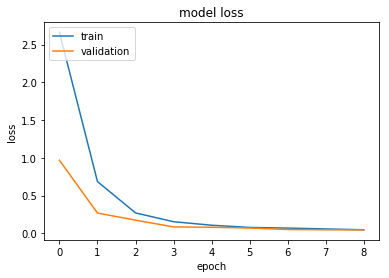

In [21]:
print("\nLoss Evolution:")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left') 
plt.show()

In [22]:
labels = {}
gtFile = open("signnames.csv") 
gtReader = csv.reader(gtFile, delimiter = ',')
next(gtReader, None)
for row in gtReader:
    if row[0] not in labels:
        labels[int(row[0])] = row[1]


Sample Test Cases:


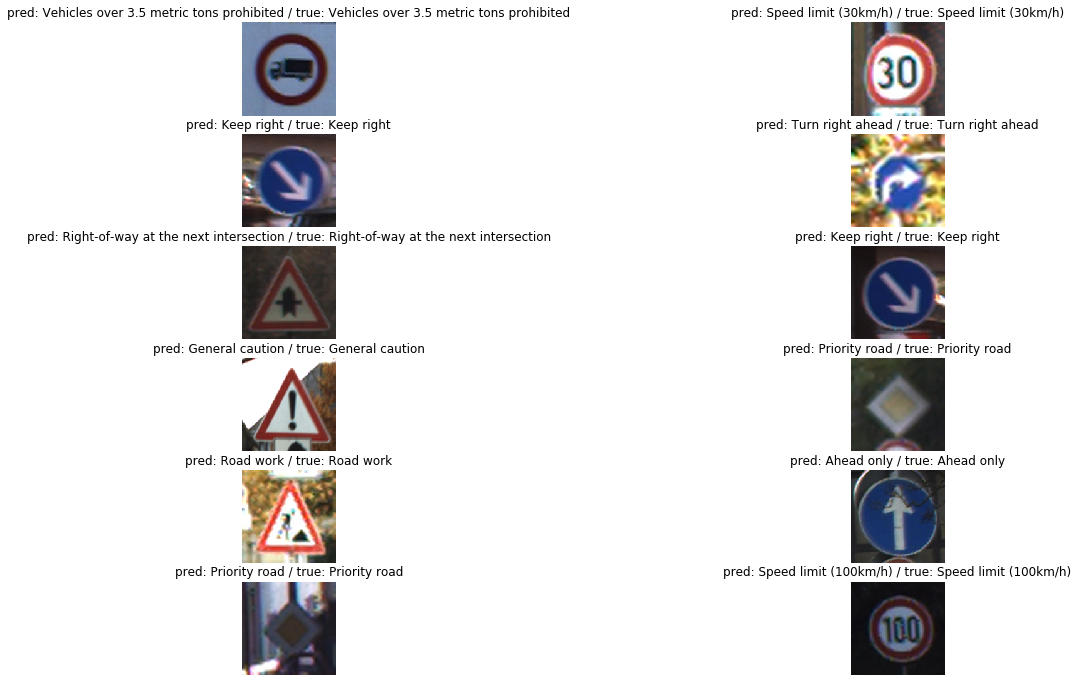

In [23]:
fig = plt.figure(figsize = (20, 12))

print("\nSample Test Cases:")
sample_x = x_test[:12]
sample_y = y_test[:12]
pred = model.predict(sample_x)
for i in range(len(sample_x)):
    fig.add_subplot(6, int(len(sample_x) / 6), i + 1)
    plt.axis('off')
    plt.imshow(sample_x[i][:,:,:])
    plt.title(str("pred: " + str(labels[np.argmax(pred[i])]) + " / true: " + str(labels[sample_y[i]])))

In [24]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk\n")

Saved model to disk

